pip install torch torchvision
pip install facenet-pytorch
pip install opencv-python

In [1]:
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
# Kiểm tra xem GPU có sẵn không
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Khởi tạo MTCNN để phát hiện khuôn mặt
mtcnn = MTCNN(keep_all=True, device=device)

# Khởi tạo Inception Resnet V1 cho nhận diện khuôn mặt
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Bước 1: Phát hiện khuôn mặt bằng MTCNN

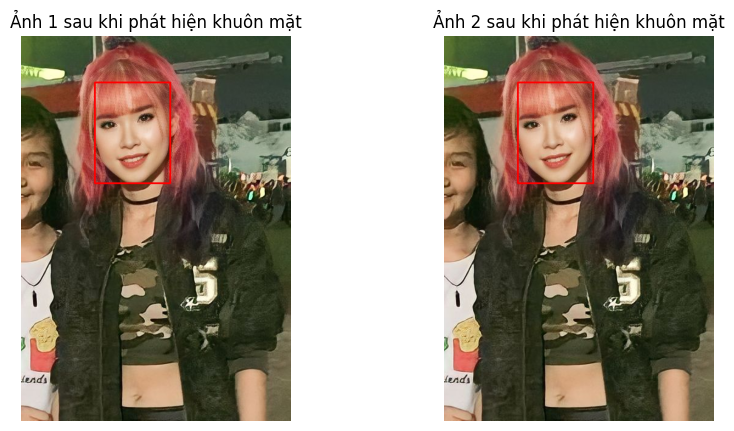

In [3]:

def detect_and_display_faces(image_path1, image_path2):
    # Đọc ảnh đầu tiên
    img1 = cv2.imread(image_path1)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

    # Đọc ảnh thứ hai
    img2 = cv2.imread(image_path2)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Phát hiện khuôn mặt trong cả hai ảnh
    boxes1, _ = mtcnn.detect(img1_rgb)
    boxes2, _ = mtcnn.detect(img2_rgb)

    # Vẽ khung khuôn mặt trên ảnh 1
    if boxes1 is not None:
        for box in boxes1:
            cv2.rectangle(img1_rgb, 
                          (int(box[0]), int(box[1])), 
                          (int(box[2]), int(box[3])), 
                          (255, 0, 0), 2)

    # Vẽ khung khuôn mặt trên ảnh 2
    if boxes2 is not None:
        for box in boxes2:
            cv2.rectangle(img2_rgb, 
                          (int(box[0]), int(box[1])), 
                          (int(box[2]), int(box[3])), 
                          (255, 0, 0), 2)

    # Hiển thị hai ảnh song song
    plt.figure(figsize=(10,5))

    # Ảnh thứ nhất
    plt.subplot(1, 2, 1)
    plt.imshow(img1_rgb)
    plt.title("Ảnh 1 sau khi phát hiện khuôn mặt")
    plt.axis('off')

    # Ảnh thứ hai
    plt.subplot(1, 2, 2)
    plt.imshow(img2_rgb)
    plt.title("Ảnh 2 sau khi phát hiện khuôn mặt")
    plt.axis('off')

    # Hiển thị ảnh
    plt.show()

# Gọi hàm với hai ảnh đầu vào
image_path1 = r'C:\Users\ATUS\Desktop\Pycharm\faceRC\km1.jpg'
image_path2 = r'C:\Users\ATUS\Desktop\Pycharm\faceRC\km1.jpg'
detect_and_display_faces(image_path1, image_path2)

## Hàm so sánh hai vector nhúng (embeddings)

In [4]:
def compare_embeddings(embedding1, embedding2, threshold=0.6):
    distance = cosine(embedding1, embedding2)
    print(f"Khoảng cách cosine giữa hai khuôn mặt: {distance}")
    
    if distance < threshold:
        print("Hai ảnh là cùng một người.")
        return True
    else:
        print("Hai ảnh là hai người khác nhau.")
        return False

## Hàm phát hiện và trích xuất đặc trưng từ khuôn mặt

In [5]:
def extract_embeddings(image_path, model):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Phát hiện khuôn mặt
    faces = mtcnn(img_rgb)
    if faces is None:
        print(f"Không tìm thấy khuôn mặt trong ảnh: {image_path}")
        return None
    
    # Nhận diện khuôn mặt
    faces = faces.to(device)
    embeddings = model(faces)
    return embeddings


## Nhận vào hai ảnh và trả về kết quả so sánh

In [6]:
def compare_two_images(image_path1, image_path2, model):
    embeddings1 = extract_embeddings(image_path1, model)
    embeddings2 = extract_embeddings(image_path2, model)
    
    if embeddings1 is None or embeddings2 is None:
        return
    
    # So sánh vector đặc trưng của hai khuôn mặt đầu tiên
    return compare_embeddings(embeddings1[0].detach().cpu().numpy(), embeddings2[0].detach().cpu().numpy())

# Thực hiện so sánh hai ảnh và trả về kết quả
result = compare_two_images(image_path1, image_path2, model)

if result:
    print("Kết quả: Hai ảnh là cùng một người.")
else:
    print("Kết quả: Hai ảnh là hai người khác nhau.")

Khoảng cách cosine giữa hai khuôn mặt: 0
Hai ảnh là cùng một người.
Kết quả: Hai ảnh là cùng một người.


In [7]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.
